# Welcome to RADIS-lab !

![](binder/radis_ico_dark.png)

This is your online environment to compute spectra and post-process them. It comes pre-installed with
- a scientific Python environment and the latest version of [the RADIS library](https://radis.github.io/).
- pre-configured databases, such as HITEMP (look in `./databases`)

### Useful links 

- [RADIS Documentation](https://radis.readthedocs.io/)
- [RADIS Community](https://github.com/radis/slack-invite) : join Slack to share your questions with other researchers, developers, and spectroscopy enthusiasts.


### Examples

Run and edit an existing notebook such as : 

- [compare_with_experiment.ipynb](./compare_with_experiment.ipynb) : upload an experimental file and compare it to a CO spectrum. 
- [compare_CO_HITRAN_HITEMP.ipynb](./compare_CO_HITRAN_HITEMP.ipynb) : CO spectra calculated with HITRAN and HITEMP at various temperatures. 
- [examples/co2-4080-4500nm/](examples/co2-4080-4500nm/co2-4080-4500.ipynb) : CO$_2$ spectrum compared with experiment, with line-of-sight absorption, and instrumental slit function. 

Or start a new notebook from the Launcher, or a new Terminal to install any extra package you need. 


### Environment

RADIS-lab uses the JupyterLab environment, and is deployed for you on [mybinder.org](http://mybinder.org/). The session will timeout after ~1hr of inactivity. You'll still be able to download your notebooks on timeout. You can also save/restore directly to your browser storage. 

[mybinder.org](http://mybinder.org/) provides 2 Gb of RAM by default. This is enough for calculations with the HITRAN database but may be limiting for HITEMP. [GESIS.org](https://notebooks.gesis.org/) can host JupyterLab with up to 8 Gb RAM for public users and 32 Gb for registered users. We are also looking for institutions to host RADIS-lab on clusters with large RAM access. 



# Start computing spectra

This is a notebook. Run the cell below with the ▶️ button in the toolbar.

Using cache file: /home/jovyan/.astropy/cache/astroquery/Hitran/tempfile_CO_1_1895.00_2305.01.h5
Using cache file: /home/jovyan/.astropy/cache/astroquery/Hitran/tempfile_CO_2_1895.00_2305.01.h5
Using cache file: /home/jovyan/.astropy/cache/astroquery/Hitran/tempfile_CO_3_1895.00_2305.01.h5
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 700 K
   Trot                 700 K
   Tvib                 700 K
   isotope              1,2,3
   mole_fraction        0.1
   molecule             CO
   path_length          1 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          2300.0000 cm-1
   wavenum_min          1900.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   broadening_max_width  10 cm-1
   broadening_method    fft
   cutoff         

/srv/conda/envs/notebook/lib/python3.6/site-packages/radis/misc/warning.py:241: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))


Spectrum calculated in 0.22s


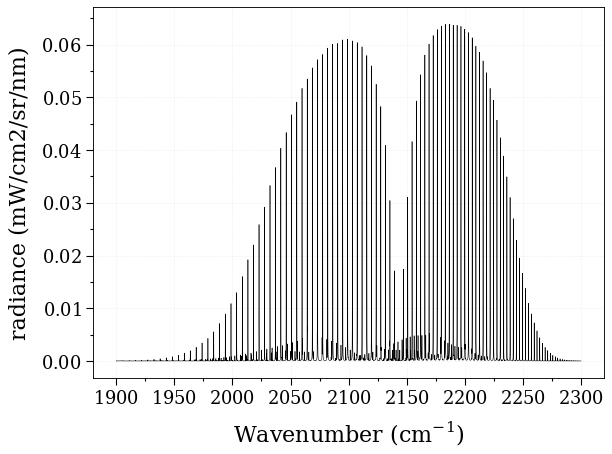

In [3]:
# Setup plots : use `%matplotlib widget` for interactive plots (zoom, etc.) but graphs will not appear on File>Export Notebook.
%matplotlib inline

from radis import calc_spectrum
s = calc_spectrum(1900, 2300,         # cm-1
                  molecule='CO',
                  isotope='1,2,3',
                  pressure=1.01325,   # bar
                  Tgas=700,           # K
                  mole_fraction=0.1,
                  path_length=1,      # cm
                  )
s.plot()    # plot the radiance by default 

Now we can do some basic post-processing functions. Below we will apply an instrumental slit function, plot changing units, store on disk and show all lines with the line survey. Have a look at the [Spectrum object](https://radis.readthedocs.io/en/latest/spectrum/spectrum.html#the-spectrum-object) in the online documentation for other uses.  

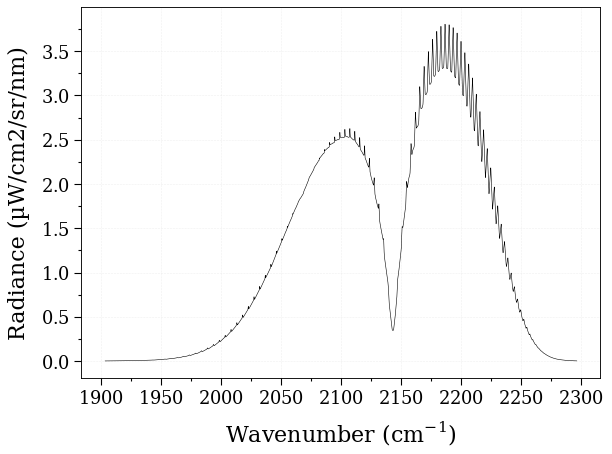

In [23]:
s.apply_slit(10, 'nm')       # simulate a (very large) instrumental slit function
s.plot(Iunit='µW/cm2/sr/nm', nfig='same')

We could also plot other spectral quantities, such as the transmittance or the opacity (absorption coefficient). See an example below :

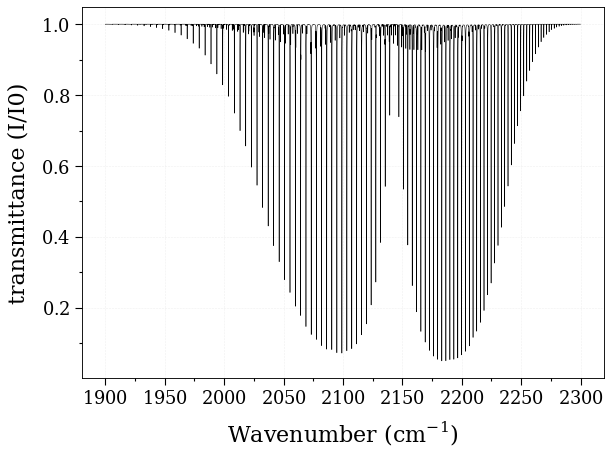

In [28]:
s.plot('transmittance_noslit')       # change to "abscoeff" for opacity

Let's [save](https://radis.readthedocs.io/en/latest/spectrum/spectrum.html#save-a-spectrum-object) the Spectrum for future use. We use `store` which saves all information about the spectrum, including emission & absorption, input parameters, the line database used, and the units. Do not make ever make any unit conversion error : just work with `.spec` files and let RADIS handle the conversions ! If really needed, you can also export some of the spectral quantites as text with `savetxt`.

In [29]:
s.store("examples/welcome.spec", compress=True)      # store the Spectrum object on disk with all the quantities (emission, absorption) and metadata (units, etc.)  
s.savetxt("examples/welcome_radiance.spec", "radiance_noslit", wunit="nm", Iunit="µW/cm2/sr/nm")

Spectrum stored in examples/welcome.spec (2.7Mb)


We can reload it afterwards with `load_spec`. The same can be used to load experimental spectra saved with their units or other information such as acquisition conditions in the  .condition dictionary. See [how to generate a Spectrum](https://radis.readthedocs.io/en/latest/spectrum/spectrum.html#how-to-generate-a-spectrum) from text files or Python arrays.

In [21]:
from radis import load_spec  # for future loading. Click on the function to get help in the Contextual Help Window. 
load_spec("welcome.spec")    # retrieves all information. 

Could not open file welcome.spec with binary=False. Trying with binary=True
Worked! Use binary=True directly in load_spec for faster loading


Finally, we will use the Line survey module to more information about the spectral lines found in the spectra. This information is stored in the Spectrum object, and on the disk when stored, unless `compress` was chosen (for large databases saving all lines used in the spectrum computation this can create large files !)

In [30]:
s.line_survey(overlay='radiance')


749 lines


# Customize your RADIS-lab


### Jupyter-Lab tips

- If you are used to Python script, you can create a .py file from a notebook at anytime with `File>Export Notebook As>Executable file`.
- JupyterLab can be improved with extensions. Open the `Extension Manager` on the left.

RADIS-lab comes with preinstalled extensions : 
- [jupyter-matplotlib](https://github.com/matplotlib/jupyter-matplotlib.git) for interactive Matplotlib plots. Initialize your notebook with `%matplotlib widget` for interactive plots (zoom, etc.). Use `%matplotlib inline` for inside plots that are properly exported.
- [jupyter-offlinenotebook](https://github.com/manics/jupyter-offlinenotebook) to download your notebooks at anytime even if your session expires, and to save/retrieve data from your browser cache. 
- [jupyterlab/hdf5](https://github.com/jupyterlab/jupyterlab-hdf5) to open .h5 files, such as line database cached files (look into `~/databases`) or rovibrational energies (into `radis/db/molecules`).

You can install your own extensions. Feel free to suggest new ones to be installed by defaut on [💬 Slack](https://github.com/radis/slack-invite) or by opening a new issue on [GitHub](https://github.com/radis/radis-lab)

### Databases

RADIS-lab currently comes with some molecules of the HITEMP database, available in `~/databases` and already preconfigured in a RADIS Configuration file [~/.radis](./.radis)  *(read more about configuration files on the [online documentation](https://radis.readthedocs.io/en/latest/lbl/lbl.html#label-lbl-config-file))*

You can download and upload other databases in a session. If you would like to have some databases pre-configured on the RADIS-lab launch, ask on the [💬 Slack](https://github.com/radis/slack-invite) or by opening a new issue on [GitHub](https://github.com/radis/radis-lab). 

# Cite

RADIS-lab is free of use ! 

If using it to compute spectra with RADIS, properly cite the RADIS code. See how on the [online documentation](https://radis.readthedocs.io/en/latest/references/references.html#cite). 

Also, make sure you cite the databases you use in your work (HITRAN / HITEMP). Citation keys can be found on the link above.